## The advection equation
$u = u (x,t) $ : density of this quantity at position $x$ and time $t$  

Tube with cross section $A$

$q = q(x,t) $ : flux of the quantity at position $x$ and time $t$

We obtain the advection equation $$\partial _t u (x,t) + \partial _x q(x,t) = 0 $$

In the linear case, the flux is proportional to the density $u$, i.e., $q = cu$, $c > 0$. We obtain the linear advection $$ \partial_t u (x,t) + c\partial_x u(x,t) = 0 $$
Given initial data
$$u(x_0,0) = \Phi(x_0) =  sin(2 \pi x_0)$$
Periodic boundary condition $$ u_0^n = u_N^n$$

Discreticize this equation using forward difference for time and backward difference for space.
$$ \frac{u_j^{n+1}-u_j^n}{\Delta t} + c \frac{u_j^n - u_{j-1}^n}{\Delta x} = 0 $$
where $$ u_j^n = u(n \Delta t, j \Delta x)$$
$$u_j^{n+1} = u_j^n - c \frac{\Delta t}{\Delta x}(u_j^n - u_{j-1}^n)$$

Domain $(t,x) \in [0, T] \times [0, 1]$, take $c = 1$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *
getcontext().prec = 32

def FTCS_advection(N, c, T, M, L, initial):
    dx = L / N
    dt = T / M
    x = np.linspace(-L/2, L/2, N+1)  # Spatial grid points
    u_initial = initial(x)
    u = np.zeros((N+1, M+1))
    u[:,0] = u_initial
    t = 0
    u[0, :] = np.zeros(M+1)
    u[N, :] = np.zeros(M+1)
    for n in range(1,M+1):
        for j in range(1,N):
            u[j,n] = u[j,n-1] - c * dt /(2* dx) * (u[j+1,n-1] - u[j-1,n-1])
        u[0,n] = u[0,n-1] - c * dt /(2* dx) * (u[1,n-1] - u[-1,n-1])
    return u


errors = []
def sinInitial(x):
    return np.sin(2 * np.pi * x)



### Crank-Nicholson method
Suppose the partial differential equation is 
$$ \frac{\partial u}{\partial t} =  F(u, x, t, \frac{\partial u}{\partial x}, \frac{\partial^2 u}{\partial x^2})$$
Let $ u(i \Delta x, n \Delta t) = u_i^n$, and $F_i^n = F$ evaluated for $i, n, u_i^n$. The equation for Crank-Nicholson method is 
$$\frac{u_i^{n+1}-u_i^n}{\Delta t} = \frac{1}{2} ( F_i^{n+1} (u, x, t, \frac{\partial u}{\partial x}, \frac{\partial^2 u}{\partial x^2}) ) + F_i^n (u, x, t, \frac{\partial u}{\partial x}, \frac{\partial^2 u}{\partial x^2}) ) $$
For the advection equation $$ \frac{\partial u}{\partial t} = - c \frac{\partial u}{\partial x} $$
The equation for Crank-Nicholson method is
$$\frac{u_i^{n+1}-u_i^n}{\Delta t} = -\frac{1}{2} c(  \frac{u_{i+1}^{n+1} - u_{i-1}^{n
+1}}{2 \Delta x}  +  \frac{u_{i+1}^n - u_{i-1}^n}{2 \Delta x}  ) = -\frac{c}{4 \Delta x} (u_{i+1}^{n+1} - u_{i-1}^{n+1} + u_{i+1}^n - u_{i-1}^n)$$
Note: Using central difference scheme $$\frac{\partial u}{\partial x} \approx \frac{u_{i+1}^n - u_{i-1}^n}{2 \Delta x} $$
Rearranging gives
$$\frac{u_i^{n+1}}{\Delta t} + \frac{c}{4 \Delta x} (u_{i+1}^{n+1} - u_{i-1}^{n+1}) = \frac{u_i^n}{\Delta t} -\frac{c}{4 \Delta x} (u_{i+1}^n - u_{i-1}^n) $$
$$ u_i^{n+1} + \frac{c \Delta t}{4 \Delta x} (u_{i+1}^{n+1} - u_{i-1}^{n+1}) = u_i^n -\frac{c \Delta t}{4 \Delta x} (u_{i+1}^n - u_{i-1}^n) $$
Let $r = \frac{c \Delta t}{4 \Delta x}$, the equation above can be written as 
$$ u_i^{n+1} + r (u_{i+1}^{n+1} - u_{i-1}^{n+1}) = u_i^n + r ( -u_{i+1}^n + u_{i-1}^n)$$
In matrix form $$ A u^{n+1} = B u^n + b^n + b^{n+1}$$
where $$A = \begin{bmatrix}1 & r & 0 & \dots & 0 & 0\\
-r & 1 & r & \dots & 0 & 0  \\
\vdots & \ddots & \ddots & \ddots & \ddots& \vdots\\
0 & 0 & 0 & 0 & -r & 1 \end{bmatrix} , 
B = \begin{bmatrix}1 & -r & 0 & \dots & 0 & 0\\
r & 1 & -r & \dots & 0 & 0  \\
\vdots & \ddots & \ddots & \ddots & \ddots& \vdots\\
0 & 0 & 0 & 0 & r & 1 \end{bmatrix},
b^n = \begin{bmatrix} r u_0^n \\ 0 \\ \vdots \\0 \\ - r u_N^n \end{bmatrix},
b^{n+1} = \begin{bmatrix} r u_0^{n+1} \\ 0 \\ \vdots \\ 0 \\ - r u_N^{n+1} \end{bmatrix}$$
For $N$, we have
$$u_N^{n+1} = \frac{1}{r} (u_{N-1}^n - u_{N-1}^{n+1} ) + (u_{N-2}^n + u_{N-2}^{n+1} - u_N^n) $$

In [2]:
def CK_advection(N, c, T, M, L, initial):
    dx = L / N
    dt = T / M 
    x = np.linspace(-L/2, L/2, N+1)  # Spatial grid points, N+1 in total
    u_initial = initial(x)
    u = np.zeros((N+1, M+1)) # Spatial grid points x_0, ...., x_N; timesteps t_0, ...., t_M
    u[:,0] = u_initial
    r = c*dt/(4*dx)
    
    #Ainv = np.linalg.inv(A) 
    for n in range(1, M+1):
        u[0,n] = u[-1,n-1]
        
        #b = np.zeros(N)
        #b[0] = r*(u[0, n-1] + u[0, n])
        #b[N-1] = -r*(u[N,n-1] + u[N,n])
        #v = np.dot(B, u[1:N+1,n-1])
        #u[1:N+1,n] = np.dot(Ainv,v+b)
        
        A = np.eye(N+1)
        B = np.zeros_like(A)
        for i in range (1,N):  
            A[i,i] = 1
            A[i,i-1]= -r
            A[i,i+1]= r
            
            B[i,i] = 1
            B[i,i-1]= r
            B[i,i+1]= -r
        
        A[0, 0], A[0, -1], A[0, 1] = 1, -r, r
        A[-1, -1], A[-1, -2], A[-1, 0] = 1, -r, r
        B[0, 0], B[0, -1], B[0, 1] = 1, r, -r
        B[-1, -1], B[-1, -2], B[-1,0] = 1, r, -r
      #  if n == 10:
      #      print("A = ", A)
      #      print("B = ", B)
        u_new = np.linalg.solve(A, B @ u[:,n-1])
        u[:,n] = u_new.copy()

    return u




In [3]:

def GaussianInitial(x):
    x = np.array(x)
    return np.exp(-x**2)


### Week 3 to-do list
1. Change initial condition to Gaussian
2. Write CFL test
3. Add visualisation of solution (2 plots u vs x(at different time t) and x vs t), 3d plot of u(x,t) (save solutoin in a separate file, export the solution as raw data, to import to another file)
4. Steve Brunton video study
5. Try Crank Nicholson (or any semi/ implicit method)


### Gaussian initial condition
For initial data $u(x_0,0) = \Phi(x_0) = G_{\sigma}(x_0) = e^{-\frac{x^2}{\sigma}}$. Try $\sigma = 2$, we have initial condition 
$$ u(x_0,0) = G_1(x_0) = e^{-x_0^2} $$
We obtain solution 
$$ u(x,t) = e^{-\frac{(x+t)^2}{2}}$$


In [4]:
def CFL(dt, dx,c):
    C = c*dt/dx
    if C <= 1:
        return 1
    else:
        return 0


### Courant-Friedrichs–Lewy condition
For the one-dimensional case, the continuous-time model equation (that is usually solved for $u$ is
$$ \partial _t u = w \partial_x u$$
The CFL condition has the following form
$$ C = w \frac{\Delta t}{\Delta x} \leq C_{max} $$
- $w$  is the magnitude of the velocity (whose dimension is length/time)
- $\Delta t$ is the time step
- $\Delta x$ is the length interval
The value of $C_{max}$ changes with the method used to solve the discretised equation, especially depending on whether the method is explicit or implicit. If an explicit (time-marching) solver is used then typically 
$C_{\max }=1$. Implicit (matrix) solvers are usually less sensitive to numerical instability and so larger values of $C_{\max}$ may be tolerated.

In [5]:
def CFL(dt, dx,c):
    C = c*dt/dx
    if C <= 1:
        return 1
    else:
        return 0


### Visualisation for the linear advection equation (Gaussian intial condition)

In [6]:
c = 1.0
T = 1.0
L = 10
M = 256 # number of time grids
N = 200 # number of spatial steps
dx = L / N
dt = T / M

Domain $(x,t) \in [0, 1] \times [0, T]$, take $c = 1$

In [7]:

x = np.linspace(-L/2, L/2, N+1)
t = np.linspace(0, T, M+1)

def u_exact(t,x):
    global c
    #return 0.5*(np.exp(-(x+t)**2) + np.exp(-(x-t)**2))
    return np.exp(-(x-c*t)**2)

t_grid, x_grid = np.meshgrid(t,x)
print("t grid", np.shape(t_grid))
print("x grid", np.shape(x_grid))
u_grid = u_exact(t_grid, x_grid)
print("u grid", np.shape(u_grid))

t grid (201, 257)
x grid (201, 257)
u grid (201, 257)


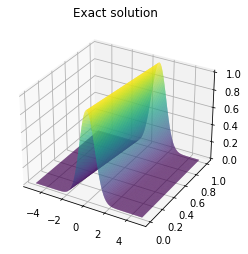

In [8]:
ax = plt.axes(projection='3d')
ax.plot_surface(x_grid, t_grid, u_grid, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Exact solution');

(201, 257)
(201, 257)


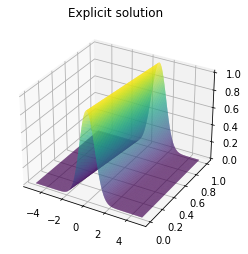

In [9]:
u_FE = FTCS_advection(N, c, T, M, L, GaussianInitial)
print(np.shape(u_FE))
print(np.shape(u_grid))
ax = plt.axes(projection='3d')
ax.plot_surface(x_grid, t_grid, u_FE, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Explicit solution');

(201, 257)
(201, 257)


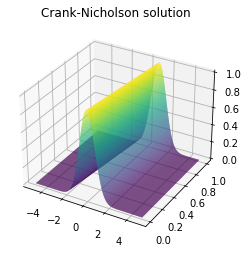

In [10]:
u_CK = CK_advection(N, c, T, M, L, GaussianInitial)
print(np.shape(u_CK))
print(np.shape(u_grid))
ax = plt.axes(projection='3d')
ax.plot_surface(x_grid, t_grid, u_CK, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Crank-Nicholson solution');

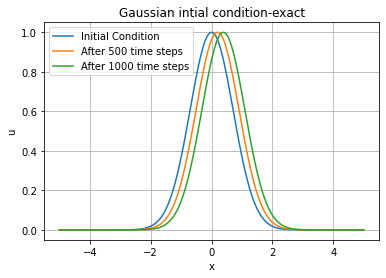

In [11]:
u_500 = u_grid[:, 50]
u_1000 = u_grid[:, 99]
plt.figure()
plt.plot(x, u_grid[:, 0], label='Initial Condition')
plt.plot(x,u_grid[:, 50], label='After 500 time steps')
plt.plot(x, u_grid[:, 99], label='After 1000 time steps')
plt.legend()
plt.title("Gaussian intial condition-exact")
plt.xlabel('x')
plt.ylabel('u')
plt.grid(True)
plt.show()

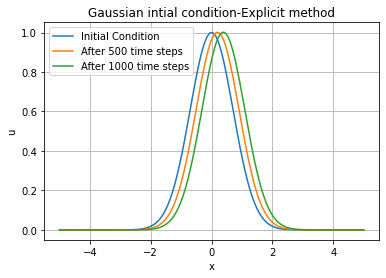

In [12]:
u_500 = u_FE[:, 50]
u_1000 = u_FE[:, 99]
plt.figure()
plt.plot(x, u_FE[:, 0], label='Initial Condition')
plt.plot(x, u_FE[:, 50], label='After 500 time steps')
plt.plot(x, u_FE[:, 99], label='After 1000 time steps')
plt.legend()
plt.title("Gaussian intial condition-Explicit method")
plt.xlabel('x')
plt.ylabel('u')
plt.grid(True)
plt.show()

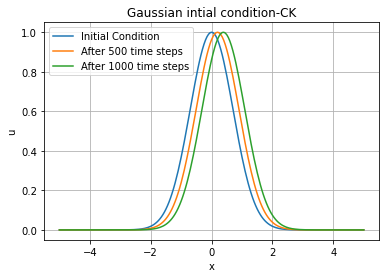

In [13]:
u_500 = u_CK[:, 50]
u_1000 = u_CK[:, 99]
plt.figure()
plt.plot(x, u_CK[:, 0], label='Initial Condition')
plt.plot(x, u_CK[:, 50], label='After 500 time steps')
plt.plot(x, u_CK[:, 99], label='After 1000 time steps')
plt.legend()
plt.title("Gaussian intial condition-CK")
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-0.05,1.05)
plt.grid(True)
plt.show()

In [14]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sys; sys.path.append('../')
from PDE_FIND import *

Populating the interactive namespace from numpy and matplotlib


In [15]:
Ut, R, rhs_des = build_linear_system(u_grid, dt, dx, D=3, P=2, time_diff = 'FD', space_diff = 'FD')
lam = 10**-5
d_tol = 5

w = TrainSTRidge(R,Ut,lam,d_tol)
print("PDE derived using STRidge with L0 penalty")
print_pde(w, rhs_des)

PDE derived using STRidge with L0 penalty
u_t = (-1.001240 -0.000000i)u_{x}
   


In [16]:
Ut, R, rhs_des = build_linear_system(u_FE, dt, dx, D=3, P=2, time_diff = 'FD', space_diff = 'FD')
lam = 10**-5
d_tol = 5

w = TrainSTRidge(R,Ut,lam,d_tol)
print("PDE derived using STRidge with L0 penalty")
print_pde(w, rhs_des)

PDE derived using STRidge with L0 penalty
u_t = (-0.999978 -0.000000i)u_{x}
   


In [17]:

Ut, R, rhs_des = build_linear_system(u_CK, dt, dx, D=3, P=2, time_diff = 'FD', space_diff = 'FD')
lam = 10**-5
d_tol = 5

w = TrainSTRidge(R,Ut,lam,d_tol)
print("PDE derived using STRidge with L0 penalty")
print_pde(w, rhs_des)

PDE derived using STRidge with L0 penalty
u_t = (-0.999989 -0.000000i)u_{x}
   
